## Neural network example


In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate training data
X = np.random.rand(n,p)-0.5
Y1 = np.sign(np.sum(X**2,1)-.1).reshape((-1, 1))/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))

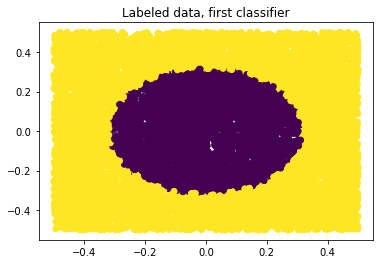

In [2]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classifier')
plt.show()

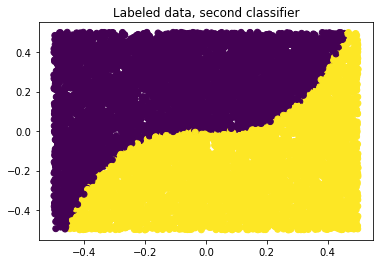

In [3]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classifier')
plt.show()

In [4]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 10 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))
        
for epoch in range(L):
    ind = np.random.permutation(n)
    for i in ind:
        # Forward-propagate
        H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
        Yhat = logsig(H@V)
         # Backpropagate
        delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
        Vnew = V-alpha*H.T@delta
        gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
        Wnew = W - alpha*Xb[[i],:].T@gamma
        V = Vnew
        W = Wnew
    print('epoch: ', epoch)

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9


In [5]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(H@V)

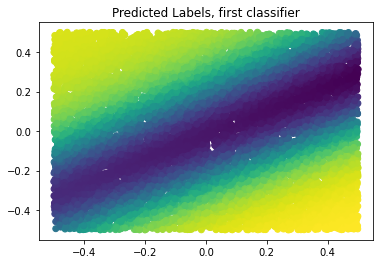

In [6]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classifier')
plt.show()

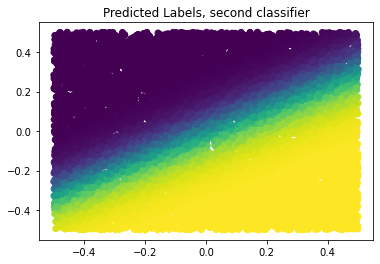

In [7]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classifier')
plt.show()

In [8]:
err_c1 = np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
print('Errors, first classifier:', err_c1)

err_c2 = np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
print('Errors, second classifier:', err_c2)

Errors, first classifier: 2927.0
Errors, second classifier: 738.0


#### a)

In [11]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 2 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 10 #number of epochs

errors_1 = []
errors_2 = []
        
for j in range(5):
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = logsig(H@V)
    errors_1.append(np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    errors_2.append(np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print(j+1,") Errors first classifier:", np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    print(j+1,") Errors second classifier:",np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
#         print('epoch: ', epoch)
print("First Classification error rate:", sum(errors_1)/5)
print("Second Classification error rate:", sum(errors_2)/5)

1 ) Errors first classifier: 3219.0
1 ) Errors second classifier: 744.0

2 ) Errors first classifier: 3022.0
2 ) Errors second classifier: 750.0

3 ) Errors first classifier: 3132.0
3 ) Errors second classifier: 747.0

4 ) Errors first classifier: 2696.0
4 ) Errors second classifier: 741.0

5 ) Errors first classifier: 3198.0
5 ) Errors second classifier: 750.0

First Classification error rate: 3053.4
Second Classification error rate: 746.4


#### b)

In [12]:
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 2 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 20 #number of epochs

errors_1 = []
errors_2 = []
        
for j in range(5):
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = logsig(H@V)
    errors_1.append(np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    errors_2.append(np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print(j+1,") Errors first classifier:", np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    print(j+1,") Errors second classifier:",np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
#         print('epoch: ', epoch)
print("First Classification error rate:", sum(errors_1)/5)
print("Second Classification error rate:", sum(errors_2)/5)

1 ) Errors first classifier: 2839.0
1 ) Errors second classifier: 754.0

2 ) Errors first classifier: 2610.0
2 ) Errors second classifier: 768.0

3 ) Errors first classifier: 2771.0
3 ) Errors second classifier: 749.0

4 ) Errors first classifier: 2629.0
4 ) Errors second classifier: 747.0

5 ) Errors first classifier: 2646.0
5 ) Errors second classifier: 750.0

First Classification error rate: 2699.0
Second Classification error rate: 753.6


#### b)
As we add up more hidden layes then the complexity increases as the amount of errors decreases

#### d)

In [13]:
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 20 #number of epochs

errors_1 = []
errors_2 = []
        
for j in range(5):
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = logsig(H@V)
    errors_1.append(np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    errors_2.append(np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print(j+1,") Errors first classifier:", np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    print(j+1,") Errors second classifier:",np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
#         print('epoch: ', epoch)
print("First Classification error rate:", sum(errors_1)/5)
print("Second Classification error rate:", sum(errors_2)/5)
# The performance improved a lot 

1 ) Errors first classifier: 272.0
1 ) Errors second classifier: 778.0

2 ) Errors first classifier: 229.0
2 ) Errors second classifier: 751.0

3 ) Errors first classifier: 295.0
3 ) Errors second classifier: 746.0

4 ) Errors first classifier: 155.0
4 ) Errors second classifier: 758.0

5 ) Errors first classifier: 115.0
5 ) Errors second classifier: 750.0

First Classification error rate: 213.2
Second Classification error rate: 756.6


#### e)

In [14]:
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 4 #number of hidden nodes

## initial weights
V = np.random.randn(M+1, q); 
W = np.random.randn(p+1, M);

alpha = 0.1 #step size
L = 20 #number of epochs

errors_1 = []
errors_2 = []
        
for j in range(5):
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate
            H = logsig(np.hstack((np.ones((1,1)), Xb[[i],:]@W)))
            Yhat = logsig(H@V)
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Vnew = V-alpha*H.T@delta
            gamma = delta@V[1:,:].T*H[:,1:]*(1-H[:,1:])
            Wnew = W - alpha*Xb[[i],:].T@gamma
            V = Vnew
            W = Wnew
    H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
    Yhat = logsig(H@V)
    errors_1.append(np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    errors_2.append(np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print(j+1,") Errors first classifier:", np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))
    print(j+1,") Errors second classifier:",np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
#         print('epoch: ', epoch)
print("First Classification error rate:", sum(errors_1)/5)
print("Second Classification error rate:", sum(errors_2)/5)
# The performance as we have more hidden nodes improves

1 ) Errors first classifier: 283.0
1 ) Errors second classifier: 436.0

2 ) Errors first classifier: 153.0
2 ) Errors second classifier: 88.0

3 ) Errors first classifier: 147.0
3 ) Errors second classifier: 117.0

4 ) Errors first classifier: 81.0
4 ) Errors second classifier: 107.0

5 ) Errors first classifier: 80.0
5 ) Errors second classifier: 86.0

First Classification error rate: 148.8
Second Classification error rate: 166.8
